In [9]:
#Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#Read the dataSet
dataset = pd.read_csv("C:/Users/soraya/Desktop/Grip_Soraya_Chaabini/Task1/student_info.csv")
print("Successfully imported data into console" )  

Successfully imported data into console


In [11]:
#Display Student Data
dataset.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


# Data Comprehension

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [13]:
dataset.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


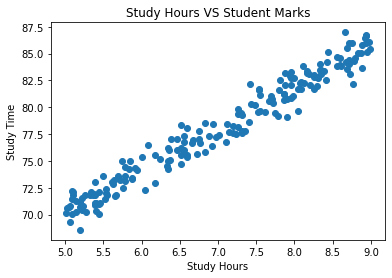

In [14]:
plt.scatter(x=dataset.study_hours,y=dataset.student_marks)
plt.xlabel("Study Hours")
plt.ylabel("Study Time")
plt.title("Study Hours VS Student Marks")
plt.show()

# Prepare The DATA FOR ML Algorithm

In [15]:
#Data Cleaning
dataset.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [16]:
dataset.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [17]:
Studentdata2=dataset.fillna(dataset.mean())

In [18]:
Studentdata2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [19]:
Studentdata2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [22]:
#SPLIT DATA FOR TRAINING 

X=Studentdata2.drop("student_marks",axis="columns")
Y=Studentdata2.drop("study_hours",axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)


shape of x (200, 1)
shape of y (200, 1)


In [14]:
#X will take all the values except for the last column which is our dependent variable (target variable)
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2, random_state=51) 

In [24]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (160, 1)
shape of Y Train (160, 1)
shape of X Test (40, 1)
shape of Y Test (40, 1)


# TRAIN A MODEL

In [25]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [26]:
linReg.fit(X_train,Y_train)

LinearRegression()

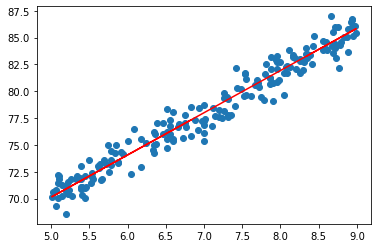

In [27]:
# Plotting the regression line
line = linReg.coef_*X+linReg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

In [38]:
#Predicting the Test set results
y_pred = linReg.predict(X_test)
print(y_pred)

[[83.11381458]
 [78.9025963 ]
 [84.57003024]
 [85.82946001]
 [84.72745896]
 [80.75238377]
 [72.84159055]
 [71.66087515]
 [73.23516235]
 [71.66087515]
 [73.47130543]
 [76.38373677]
 [73.23516235]
 [73.58937697]
 [82.95638585]
 [70.40144538]
 [73.23516235]
 [78.74516758]
 [75.55723598]
 [82.68088559]
 [76.65923703]
 [70.48015974]
 [74.77009238]
 [77.98143645]
 [85.59331693]
 [82.56281405]
 [76.42309395]
 [85.0423164 ]
 [78.39095296]
 [81.38209865]
 [81.73631327]
 [83.15317176]
 [82.20859943]
 [81.10659839]
 [73.58937697]
 [71.1492318 ]
 [71.89701823]
 [81.53952737]
 [72.60544747]
 [71.93637541]]


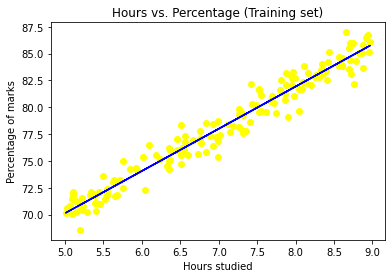

In [28]:
#Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'yellow')
plt.plot(X_train, linReg.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

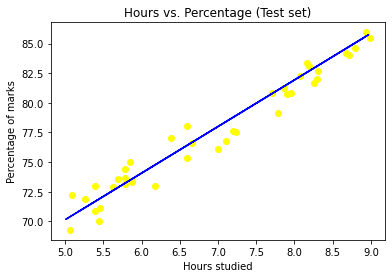

In [29]:
#Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'yellow')
plt.plot(X_train, linReg.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [56]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["study_hours","student_marks_original","student_marks_predicted"])


,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Evaluate The Model


In [30]:
linReg.score(X_test,Y_test)

0.9514124242154464

In [33]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = linReg.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [[89.8045352]].


# ERROR Metrics

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 0.878069020888319


In [40]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(Y_test,y_pred))

The R-Square of the model is:  0.9514124242154464
